# Bank Marketing Campaign Project

### Problem Definition

Portuguese bank is having a decrease in its revenue. The bank wants to be able to predict which clients are most likely to subscribe a term deposit so they can focus marketing efforts and resources on them and avoid wasting money and time on clients that will probably not subscribe. 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading Data

In [2]:
#Let's load the data and take a first look to the first rows.

data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv',sep=";")
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Understanding

In [3]:
print("The shape of the data is:" + str(data.shape))


The shape of the data is:(41188, 21)


Which means there are 41188 rows and 21 columns (features).

In [4]:
#Checking if there are null values and each feature's type.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We can see that there are 11 categorical columns and 10 numerical columns (including integers and float data type). 
Our target variable is called 'y' and is also a categorical column.

### Checking for missing values

In [3]:
#Checking of there are any null values at any feature column.
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

As we can see there are no missing values so there will be no need to impute them.

We will check if the dataset is unbalanced or balanced. If the data set is unbalanced, we need to either downsample the majority or oversample the minority to balance it.

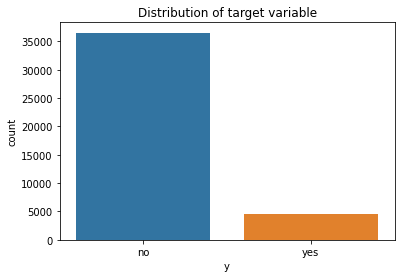

In [4]:
#Let's look at the distribution of our target variable to see if this is an unbalanced data.
sns.countplot(x=data['y'], data=data)
plt.title('Distribution of target variable')
plt.show()

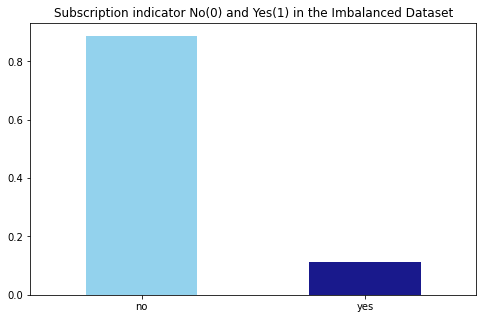

In [5]:
fig = plt.figure(figsize = (8,5))
data.y.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Subscription indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

We can observe that the presence of “0” and “1” is almost in the 87:13 ratio. So there is a class imbalance and we have to deal with it. To fight against the class imbalance, we will use here the oversampling of the minority class. Since the size of the dataset is quite small, majority class subsampling wouldn’t make much sense here.

In [6]:
#The y variable has yes/no values. Let's convert them to binary (1/0) for our convenience.

data['y'].replace({'no': 0, 'yes': 1},inplace = True)

**Handling Class Imbalance For Rainfall Prediction**

<AxesSubplot:>

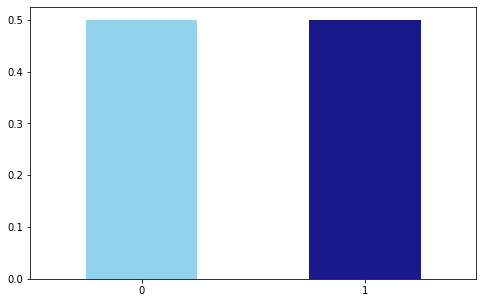

In [7]:
from sklearn.utils import resample

no = data[data.y == 0]
yes = data[data.y == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.y.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)

## Exploratory Data Analysis

In [8]:
oversampled.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [9]:
#Let's check the categories in each of those features

def countplot_features(feature):
    fig = plt.figure(figsize=(15,10))
    plot=sns.countplot(x=feature,data=oversampled)
    plt.show()

In [10]:
def countplot_targetvsfeature(feature,target):
    fig = plt.figure(figsize=(15,10))
    plot=sns.countplot(x=feature,data=oversampled,hue=target)
    plt.show()

**1. Job**

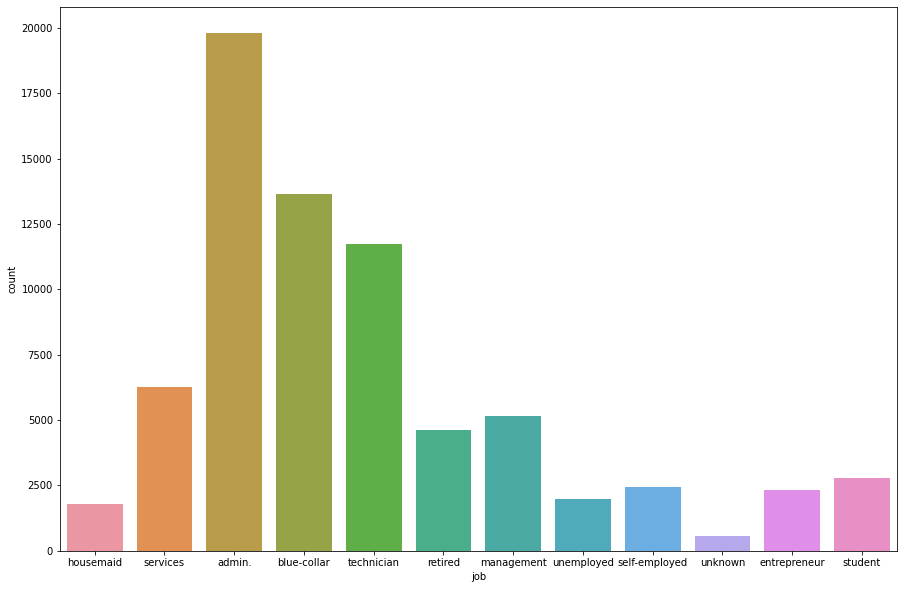

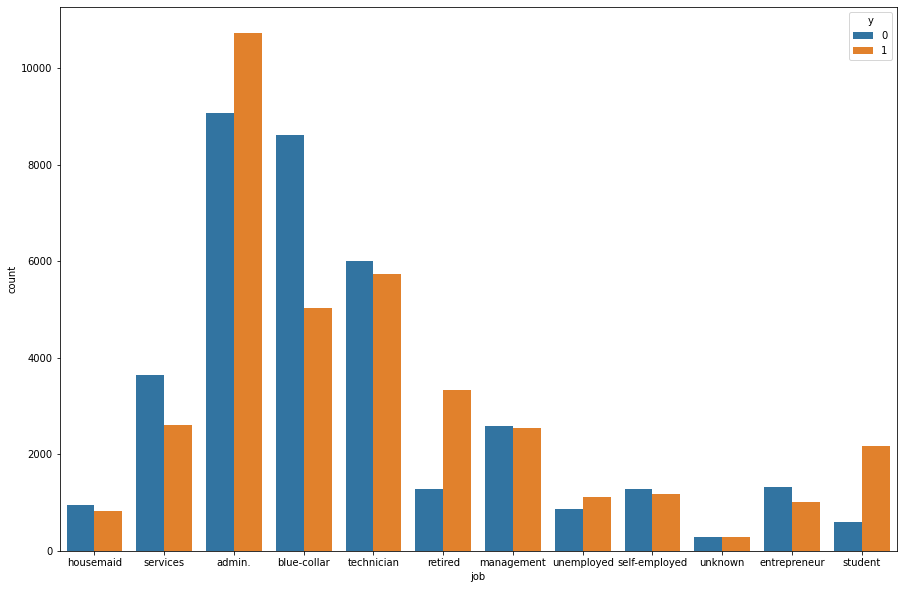

In [11]:
countplot_features('job')
countplot_targetvsfeature('job', 'y')

**2. Marital**

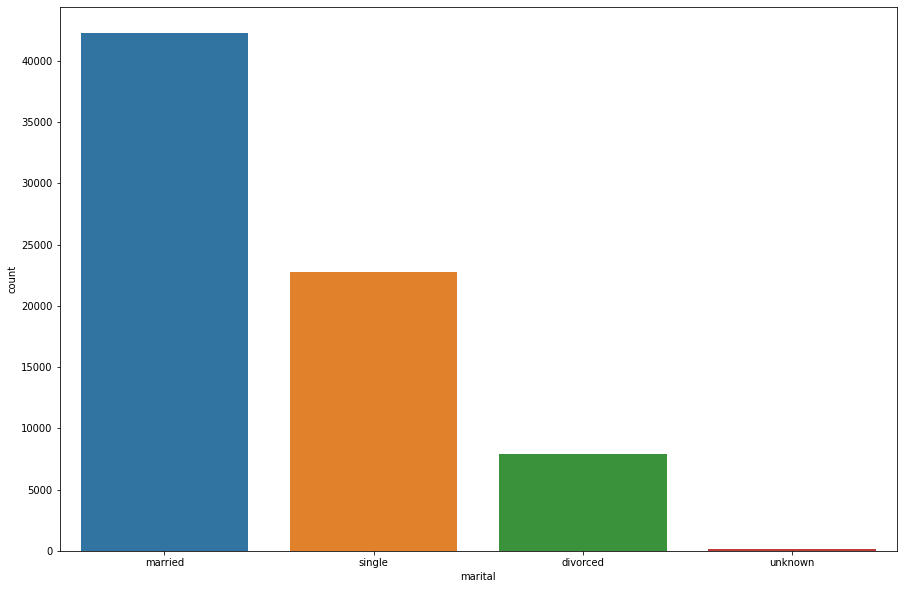

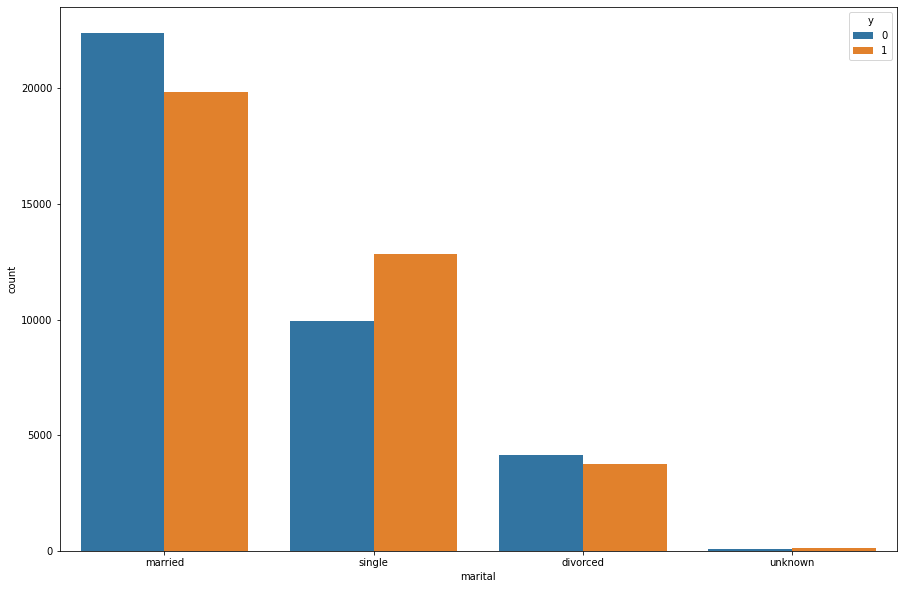

In [25]:
countplot_features('marital')
countplot_targetvsfeature('marital', 'y')

**3. Education**

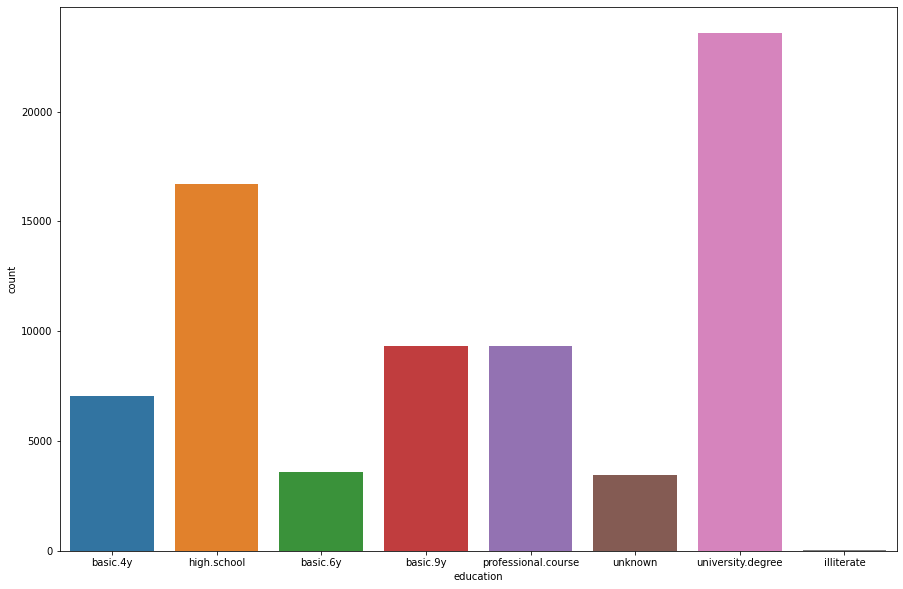

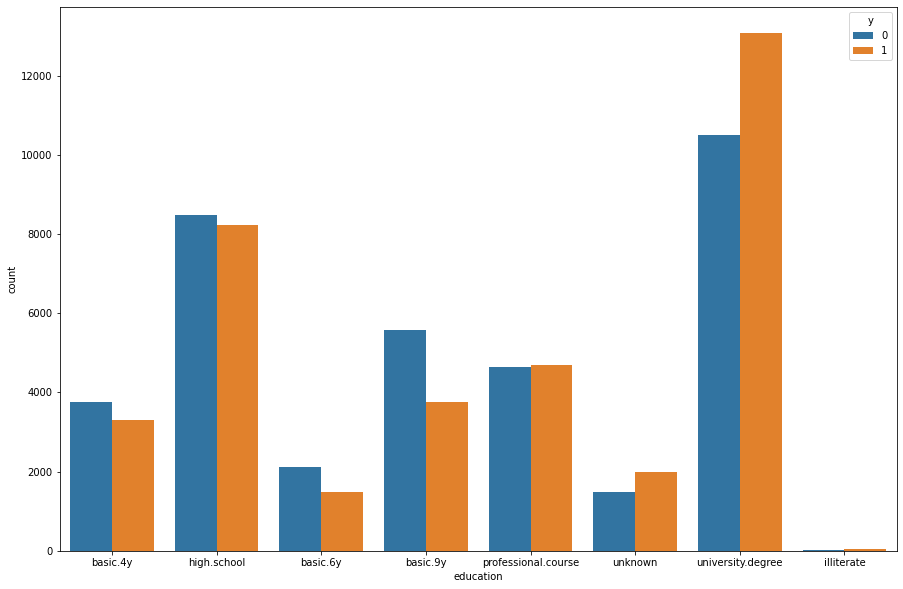

In [26]:
countplot_features('education')
countplot_targetvsfeature('education', 'y')

**4. Default**

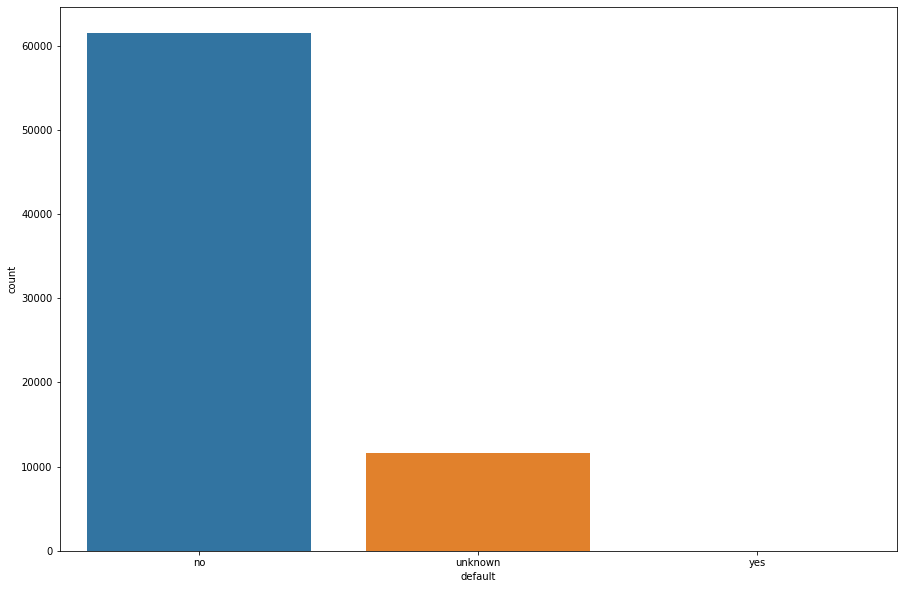

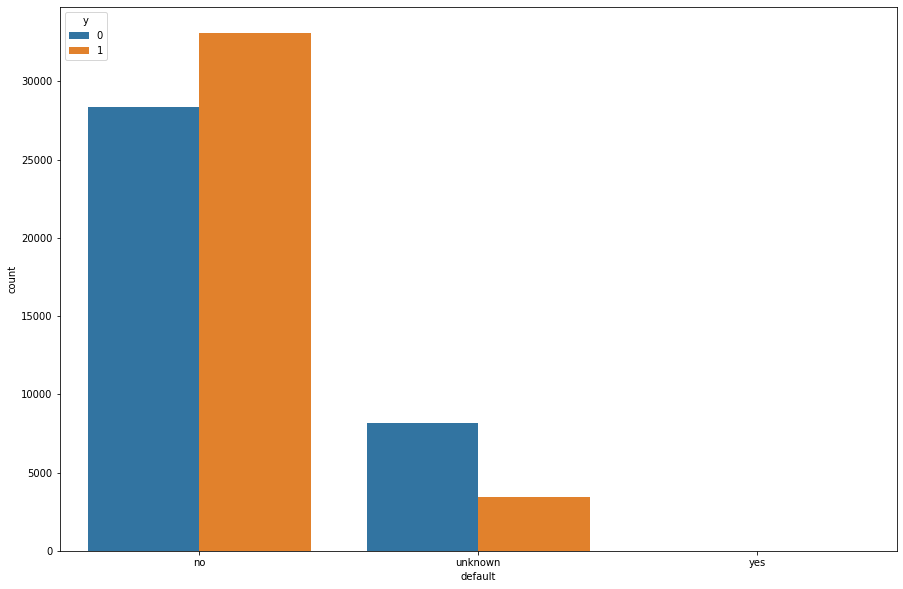

In [27]:
countplot_features('default')
countplot_targetvsfeature('default', 'y')

**5. Housing**

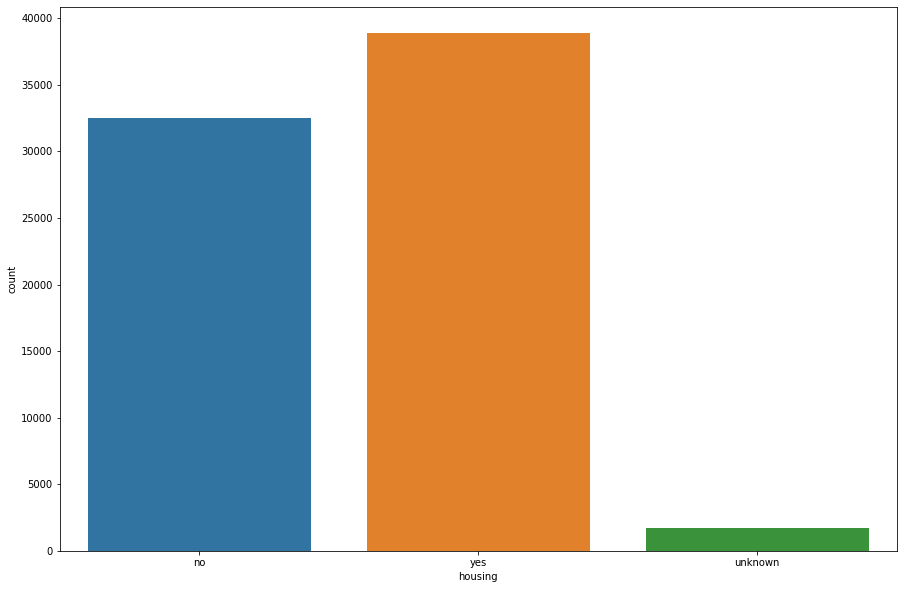

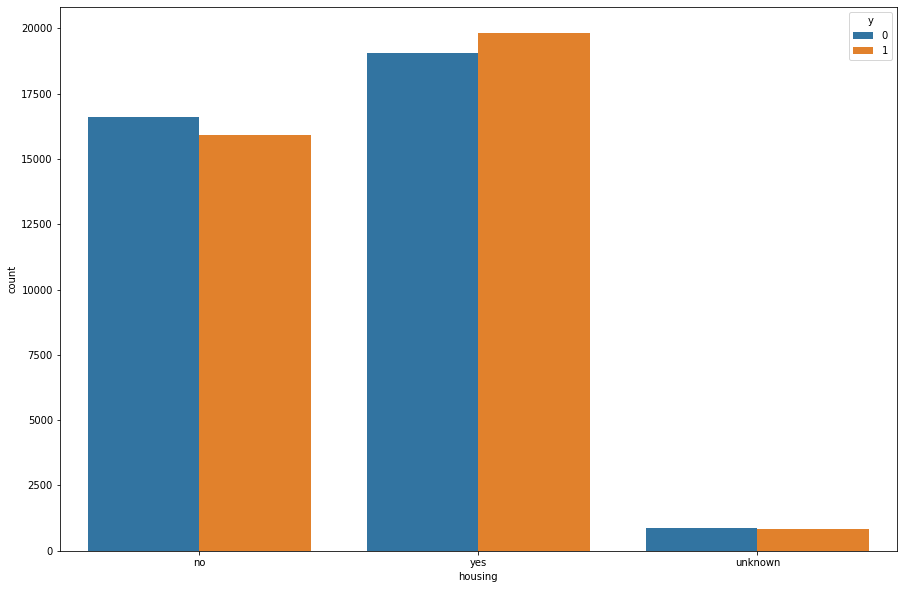

In [28]:
countplot_features('housing')
countplot_targetvsfeature('housing', 'y')

**6. Loan**

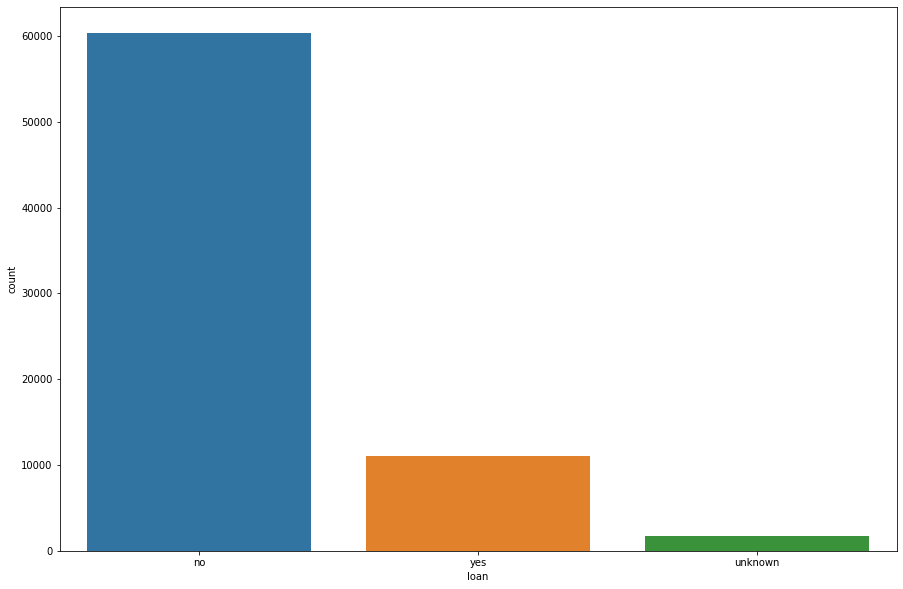

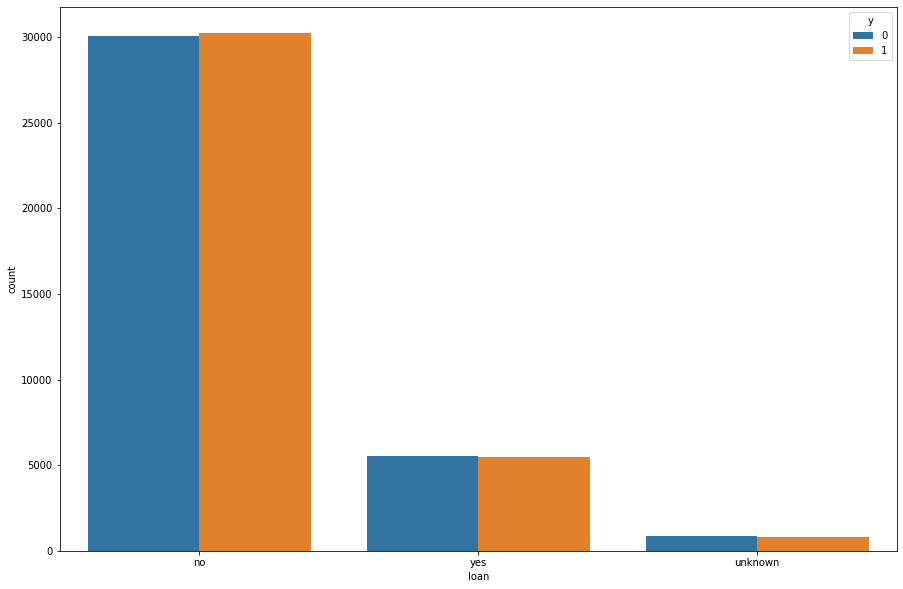

In [29]:
countplot_features('loan')
countplot_targetvsfeature('loan', 'y')

**7. Contact**

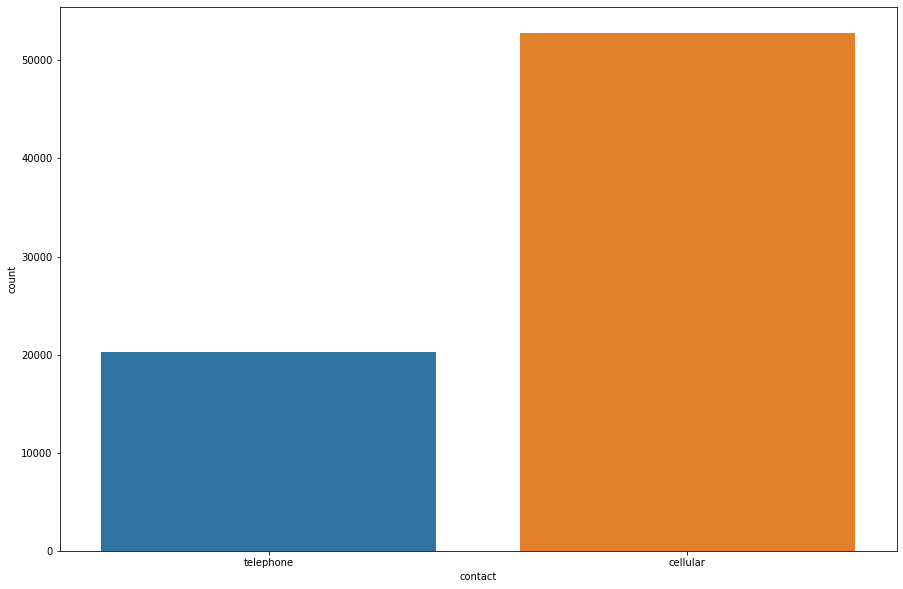

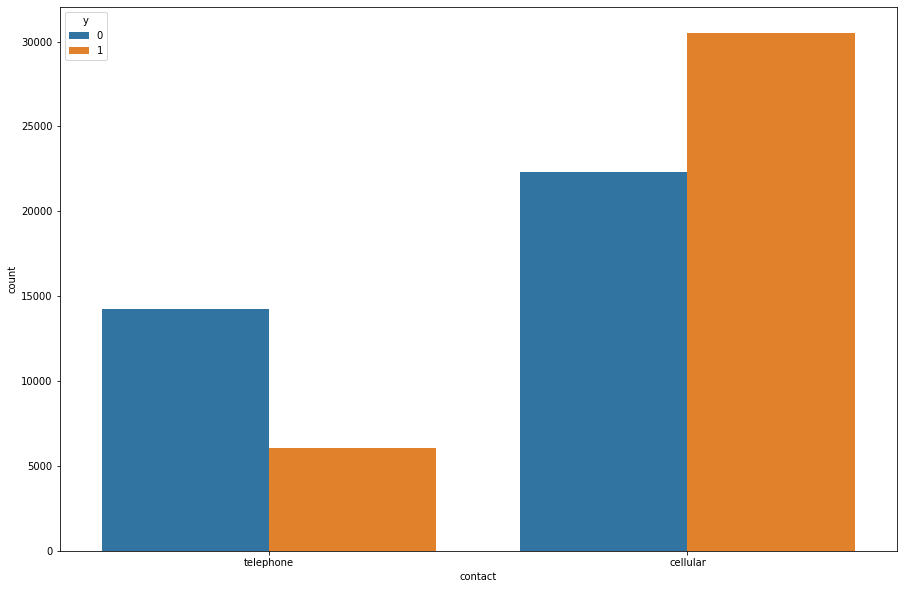

In [30]:
countplot_features('contact')
countplot_targetvsfeature('contact', 'y')

**8. Month**

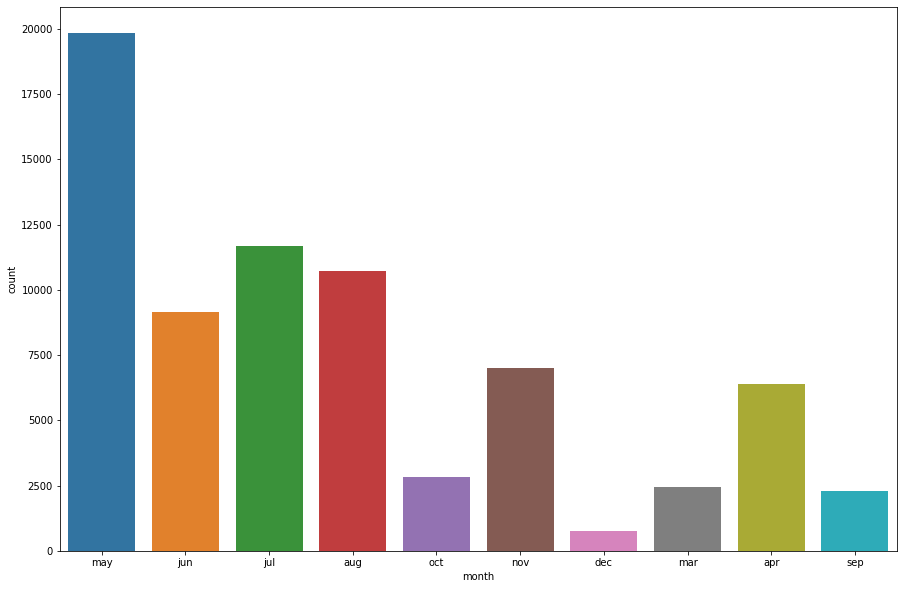

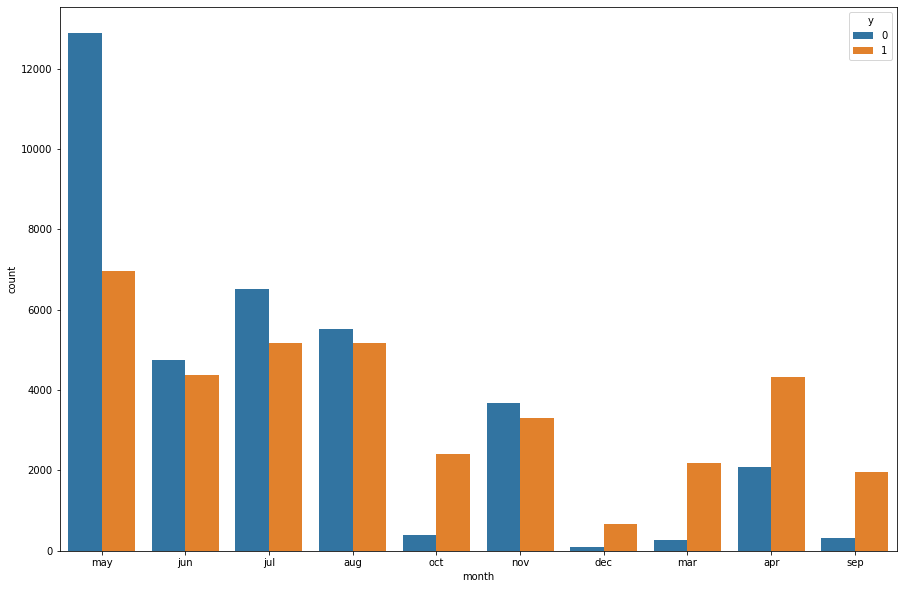

In [31]:
countplot_features('month')
countplot_targetvsfeature('month', 'y')

**9. Day of the week**

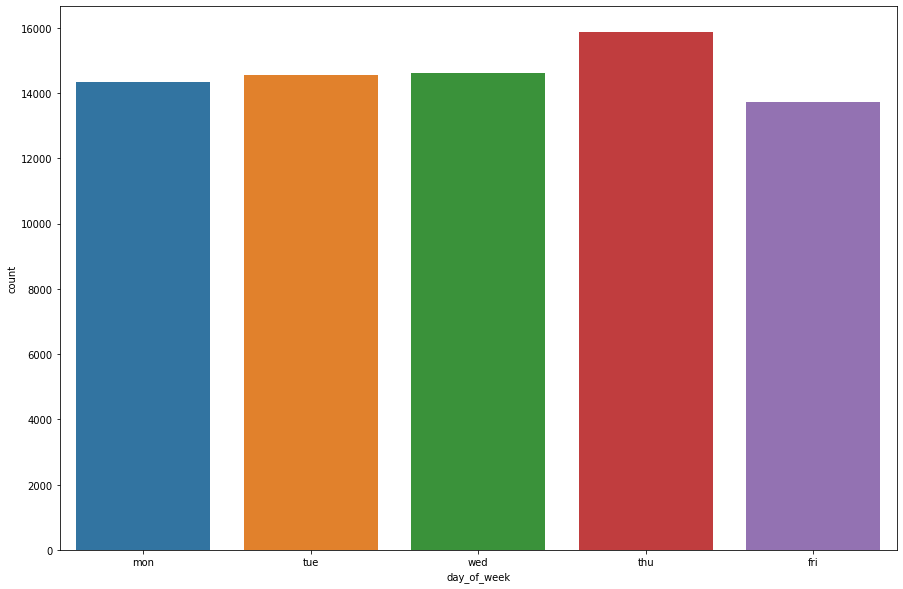

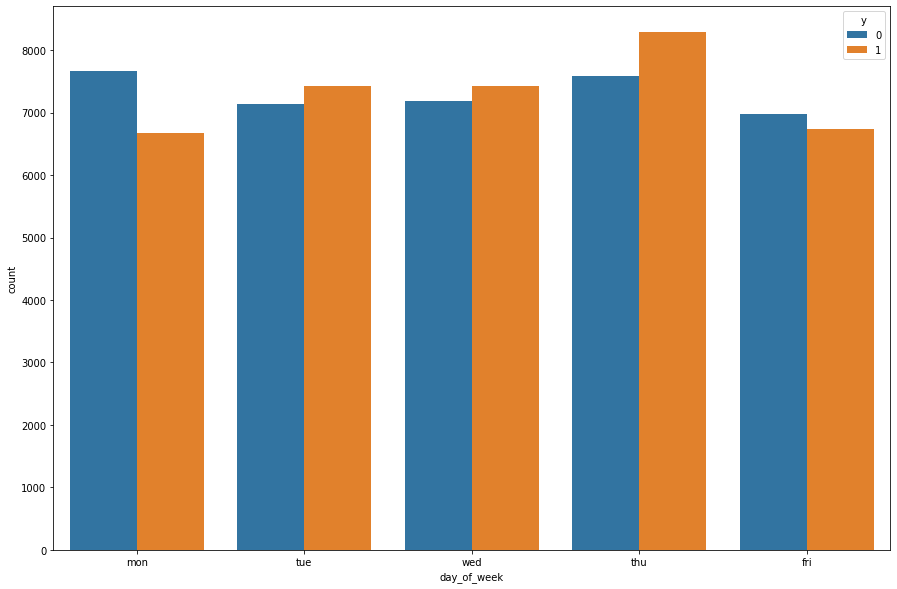

In [32]:
countplot_features('day_of_week')
countplot_targetvsfeature('day_of_week', 'y')

**10. Previous Outcome**

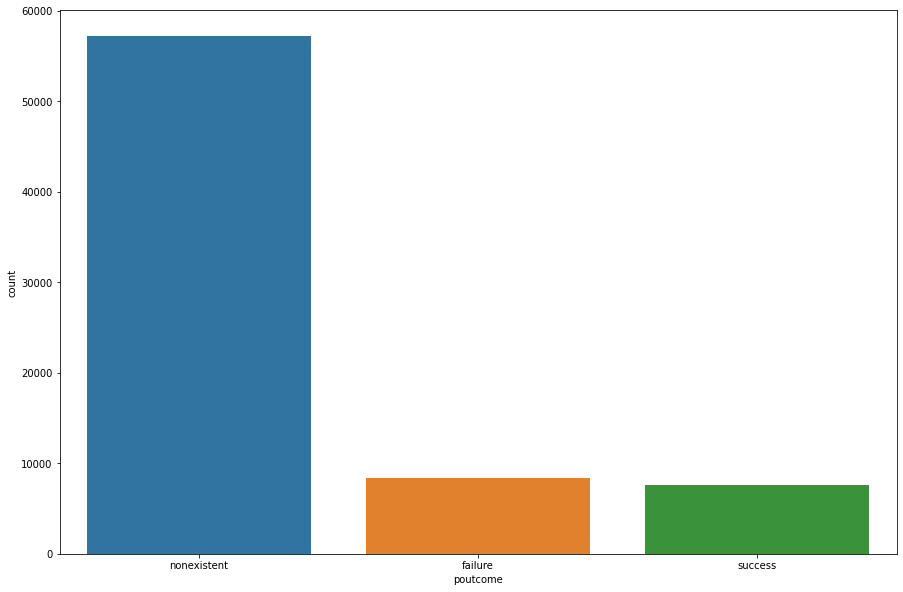

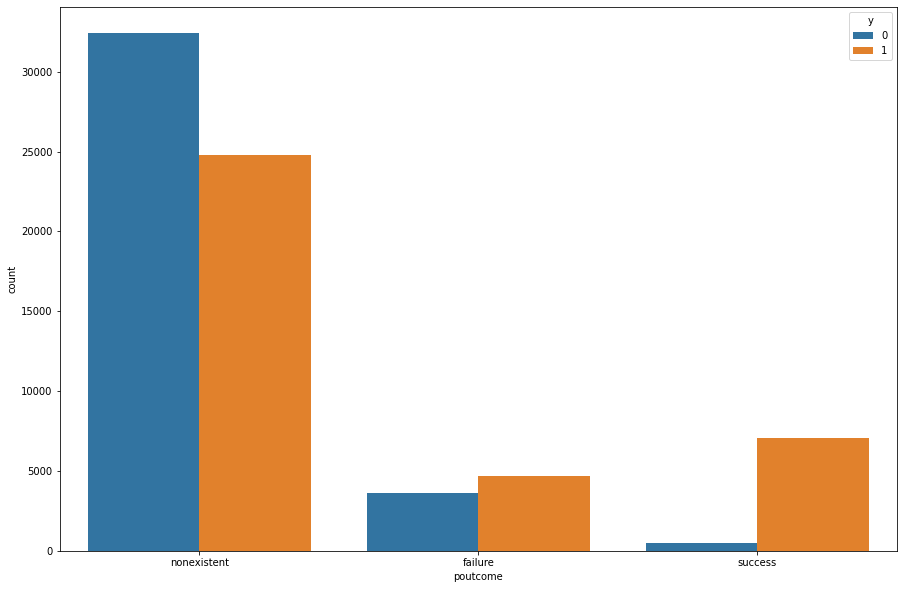

In [33]:
countplot_features('poutcome')
countplot_targetvsfeature('poutcome', 'y')

The graphic above shows us a lot of non existent previous outcome, which makes us think that those people never answered the phone in the previous campaign but this time some of them even accepted a term deposit.

### Numerical features

**1. Relation between Pdays vs Previous**

<AxesSubplot:xlabel='pdays', ylabel='previous'>

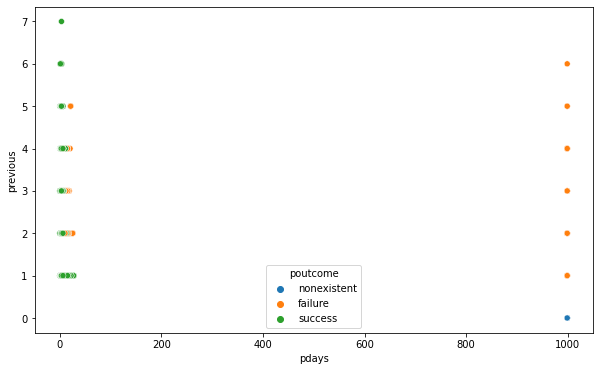

In [12]:
#Let's verify that there is coherence between the pdays variable 
#(#of days since last contacted----> if 999 then client was never contacted before) 
#and previous variable (# of times contacted in last campaign).

plt.figure(figsize=(10,6))
sns.scatterplot(x=oversampled['pdays'], y=oversampled['previous'], hue = oversampled['poutcome'])


In this graph we can confirm that the non-existent values (blue dot) in Previous campaign is because they were never contacted before (0 previous & 999 pdays) so there can't be any previous outcome. 

Orange dots on the left tells us the negative outcomes we had with people contacted from 2-5 times.
Green dots on the left tells us the positive outcomes we had in the past with people contacted from 1 - 7 times.

However the orange dots on the right tells us the negative outcomes we had in the past with people contacted from 1-6 times, even tough the 'pdays' feature tells us those people were never contacted before (999 days).

To avoid confusions we will only use the 'previous' feature to know if someone was contacted before or not. Pdays feature will be eliminated during our data cleaning.

**2. Relation between duration of calls, number of times called in this campaign and its respective outcome (y)**

<AxesSubplot:xlabel='campaign', ylabel='duration'>

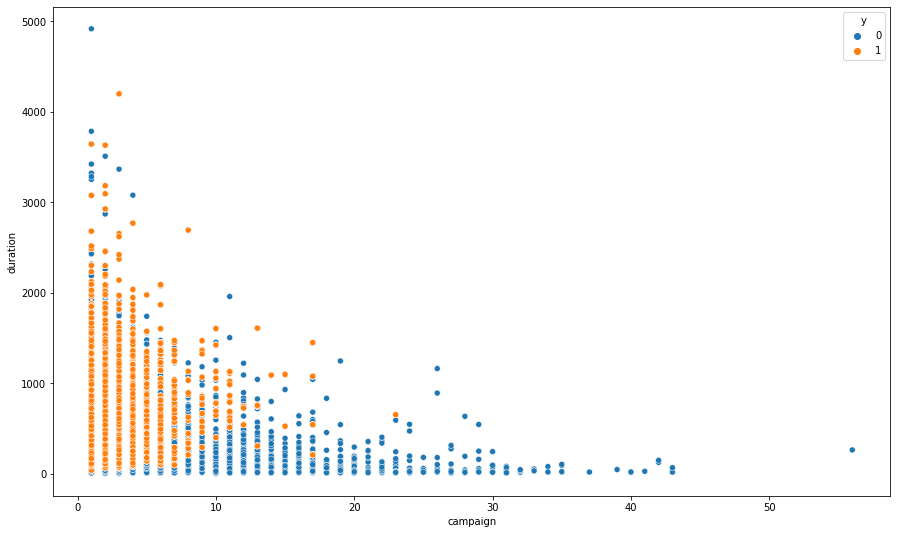

In [13]:
plt.figure(figsize=(15,9))
sns.scatterplot(x= oversampled['campaign'], y= oversampled['duration'], hue = oversampled['y'])


In the graphic above we can see that there is a negative relation between campaign (number of times client was called during this campaign) and duration of calls. The more the duration of calls, the less times that client was contacted. We could say people whom have been called more than 12 times, normally do not answer, or have a very short answer. 

**3. Relation between job, age and outcome of this campaign**

<AxesSubplot:xlabel='job', ylabel='age'>

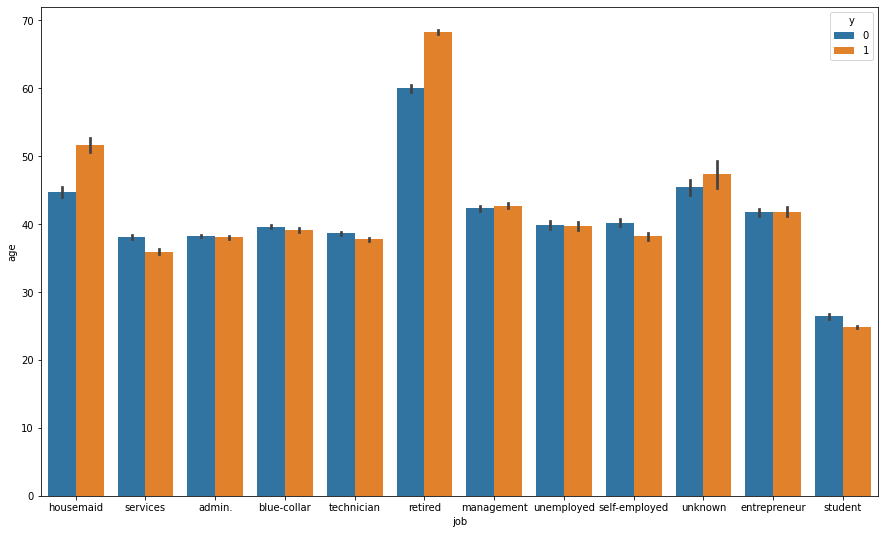

In [14]:
#Can we visualize what job and age is a more common client for a term deposit?

plt.figure(figsize=(15,9)) 
sns.barplot(x= oversampled['job'], y= oversampled['age'], hue= oversampled['y'])


We can see that there is a bigger difference between yes and no subscribers in retired people from a range of 65-70 years old, and housemaids in a range of 50-55 years old.

In [15]:
num_cols = oversampled.select_dtypes(['int', 'float']).columns

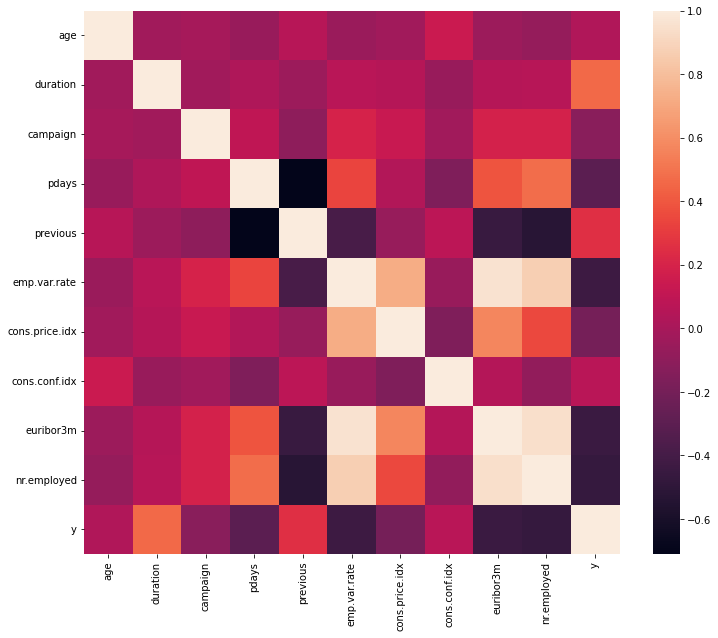

In [16]:
#We graph numerical data correlation to see if I find any other interesting relations. 

fig = plt.figure(figsize=(12,10))
cor_matrix = pd.concat([oversampled[num_cols]], axis = 1).corr()
sns.heatmap(cor_matrix)
plt.show()


Number of employees rate is highly correlated with employee variation rate and bank interest rates.

Consumer price index is highly correlated with bank interest rate( higher the price index, higher the interest rate) and employee variation rate.

Number of contacts performed before this campaign has a highly negative correlation with employee variation rate and bank interest rates. (The higher the interest rates , the less contacts performed before this campaign).

# Data Cleaning and Preparation



We have finished visualizing features so we will use again our main data variable to start cleaning and preparing the data.

**1. Checking for outliers**

In [17]:
oversampled.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,73096.000000,73096.000000,73096.000000,73096.000000,73096.000000,73096.000000,73096.000000,73096.000000,73096.000000,73096.000000,73096.000000
mean,40.360690,387.648257,2.343001,886.930762,0.312644,-0.491941,93.478330,-40.216186,2.967535,5135.768637,0.500000
std,11.975303,361.616524,2.368039,314.222424,0.697941,1.721887,0.633032,5.348951,1.889335,86.819671,0.500003
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,31.000000,144.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000,0.000000
50%,38.000000,266.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000,0.500000
75%,48.000000,526.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000,1.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


To have a more general view we used Describe function to see what numerical features have minimum or maximum numbers very far away from the mean value. We notice that age, duration and campaign are those 3 features we will look closer to search for outliers.

**Age**

In [18]:
stat1= oversampled['age'].describe()
print(stat1)

count    73096.000000
mean        40.360690
std         11.975303
min         17.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         98.000000
Name: age, dtype: float64


In [19]:
IQR1 = stat1['75%']-stat1['25%']
upper1 = stat1['75%'] + 1.5*IQR1
lower1 = stat1['25%'] - 1.5*IQR1
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper1,lower1))

The upper & lower bounds for suspected outliers are 73.5 and 5.5.


Text(0, 0.5, 'Age')

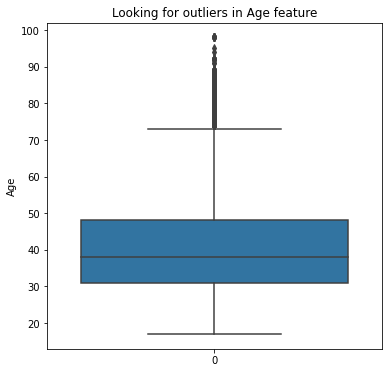

In [20]:
plt.figure(figsize=(6,6))
sns.boxplot(data=oversampled['age'])
plt.title('Looking for outliers in Age feature')
plt.ylabel('Age')

As the minimum number is 17 there is no need to look for the outliers below 9.5

**Duration**

In [21]:
stat2= oversampled['duration'].describe()
print(stat2)

count    73096.000000
mean       387.648257
std        361.616524
min          0.000000
25%        144.000000
50%        266.000000
75%        526.000000
max       4918.000000
Name: duration, dtype: float64


In [22]:
IQR2 = stat2['75%']-stat2['25%']
upper2 = stat2['75%'] + 1.5*IQR2
lower2 = stat2['25%'] - 1.5*IQR2
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper2,lower2))

The upper & lower bounds for suspected outliers are 1099.0 and -429.0.


Text(0, 0.5, 'Duration')

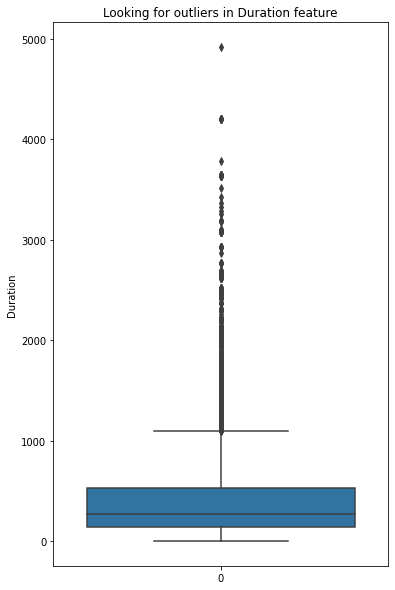

In [23]:
plt.figure(figsize=(6,10))
sns.boxplot(data=oversampled['duration'])
plt.title('Looking for outliers in Duration feature')
plt.ylabel('Duration')

As the minimum number is 0 there is no need to look for outliers below -223.5

**Campaign**

In [24]:
stat3= data['campaign'].describe()
print(stat3)

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


In [25]:
IQR3 = stat3['75%']-stat3['25%']
upper3 = stat3['75%'] + 1.5*IQR3
lower3 = stat3['25%'] - 1.5*IQR3
print('The upper & lower bounds for suspected outliers are {} and {}.'.format(upper3,lower3))

The upper & lower bounds for suspected outliers are 6.0 and -2.0.


Text(0, 0.5, 'Campaign')

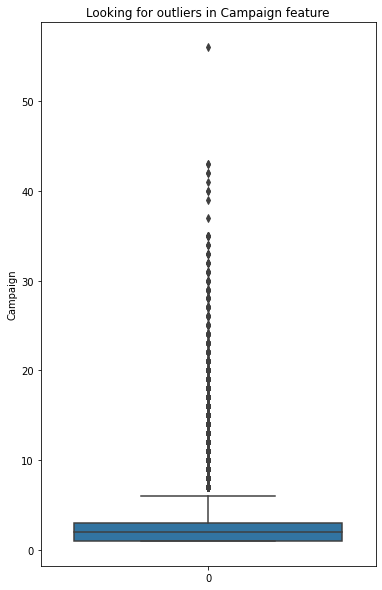

In [26]:
plt.figure(figsize=(6,10))
sns.boxplot(data=oversampled['campaign'])
plt.title('Looking for outliers in Campaign feature')
plt.ylabel('Campaign')

As the minimun number is 1 there is no need to look for outliers below -2.

**2. Replacing 'unknown' values**

Let's use the most frequent value to replace each of the unknown values in categorical features.  

In [29]:
def replace_with_frequent(df,col):
    frequent = df[col].value_counts().idxmax()
    print("The most frequent value is:", frequent)
    df[col].replace('unknown', frequent , inplace = True)
    print("Replacing unknown values with the most frequent value:", frequent)

In [30]:
#Replacing unknown values in categorical features.
print('Job:')
replace_with_frequent(oversampled, "job")
print('-'*50)
print('Marital:')
replace_with_frequent(oversampled, "marital")
print('-'*50)
print('Education:')
replace_with_frequent(oversampled, "education")
print('-'*50)
print('Default:')
replace_with_frequent(oversampled, "default")
print('-'*50)
print('Housing:')
replace_with_frequent(oversampled, "housing")
print('-'*50)
print('Loan:')
replace_with_frequent(oversampled, "loan")


Job:
The most frequent value is: admin.
Replacing unknown values with the most frequent value: admin.
--------------------------------------------------
Marital:
The most frequent value is: married
Replacing unknown values with the most frequent value: married
--------------------------------------------------
Education:
The most frequent value is: university.degree
Replacing unknown values with the most frequent value: university.degree
--------------------------------------------------
Default:
The most frequent value is: no
Replacing unknown values with the most frequent value: no
--------------------------------------------------
Housing:
The most frequent value is: yes
Replacing unknown values with the most frequent value: yes
--------------------------------------------------
Loan:
The most frequent value is: no
Replacing unknown values with the most frequent value: no


We saw in the Exploratory Data Analysis that 'contact', 'month', 'day_of_week' and 'poutcome' did not have unknown value so we are not replacing any value there.

In [31]:
#Verifying if unknown values were replaced


print("Job:", oversampled.job.value_counts(),sep = '\n')
print("-"*50)
print("Marital status:", oversampled.marital.value_counts(), sep = '\n')
print("-"*50)
print("Education:", oversampled.education.value_counts(), sep = '\n')
print("-"*50)
print("Default credit:", oversampled.default.value_counts(), sep = '\n')
print("-"*50)
print("Housing loan:", oversampled.housing.value_counts(), sep = '\n')
print("-"*50)
print("Personal Loan:", oversampled.loan.value_counts(), sep = '\n')
print("-"*50)
print("Contact method:", oversampled.contact.value_counts(), sep = '\n')
print("-"*50)
print("Month:", oversampled.month.value_counts(), sep = '\n')
print("-"*50)
print("Day_of_week:", oversampled.day_of_week.value_counts(), sep = '\n')
print("-"*50)
print("Previous outcome:", oversampled.poutcome.value_counts(), sep = '\n')

Job:
admin.           20382
blue-collar      13639
technician       11748
services          6258
management        5140
retired           4609
student           2768
self-employed     2449
entrepreneur      2342
unemployed        1982
housemaid         1779
Name: job, dtype: int64
--------------------------------------------------
Marital status:
married     42428
single      22797
divorced     7871
Name: marital, dtype: int64
--------------------------------------------------
Education:
university.degree      27034
high.school            16722
professional.course     9331
basic.9y                9323
basic.4y                7053
basic.6y                3583
illiterate                50
Name: education, dtype: int64
--------------------------------------------------
Default credit:
no     73093
yes        3
Name: default, dtype: int64
--------------------------------------------------
Housing loan:
yes    40600
no     32496
Name: housing, dtype: int64
----------------------------------

**3. Converting Age into categorical data**

In [32]:
#add a new column next to the age column for age groups.

age_groups = pd.cut(oversampled['age'],bins=[10,20,30,40,50,60,70,80,90,100],
                    labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])

#inserting the new column
oversampled.insert(1,'age_group',age_groups)

#dropping age column
oversampled.drop('age',axis=1,inplace=True)

In [33]:
#Let's verify the change has taken place and visualize it
oversampled.head(2)

,age_group,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,50-59,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,50-59,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


**4. Grouping education categories 'basic.9y','basic.6y','basic4y' into 'middle_school'**

In [34]:
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    oversampled.loc[oversampled['education'] == i, 'education'] = "middle.school"

oversampled['education'].value_counts()

university.degree      27034
middle.school          19959
high.school            16722
professional.course     9331
illiterate                50
Name: education, dtype: int64

In [35]:
oversampled.head(2)

,age_group,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,50-59,housemaid,married,middle.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,50-59,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


**5. Dropping pdays column**

As we mentioned in the Exploratory Data Analysis, because of the inconsistency in *pdays* vs *previous* and *poutcome* we will only use the *previous* feature to determine if a client was called before.



In [36]:
oversampled.drop('pdays', axis=1, inplace= True)

**6. Removing duplicates**

In [39]:
#Removing duplicates
oversampled=oversampled.drop_duplicates()
oversampled.shape

(41144, 20)

**7. Encoding ordinal features**

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

oversampled['age_group'] = encoder.fit_transform(oversampled['age_group'])
oversampled['education'] = encoder.fit_transform(oversampled['education'])

In [41]:
oversampled.head()

,age_group,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,4,housemaid,married,2,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,4,services,married,0,no,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,2,services,married,0,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,2,admin.,married,2,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,4,services,married,0,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


**9. Encoding categorical features that are not ordinal**

In [42]:
oversampled = pd.get_dummies(oversampled, columns = ['job', 'marital', 'default','housing', 'loan', 'contact', 'poutcome'])
oversampled.head()

,age_group,education,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,4,2,may,mon,261,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,1,0
1,4,0,may,mon,149,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,1,0
2,2,0,may,mon,226,1,0,1.1,93.994,-36.4,...,0,0,1,1,0,0,1,0,1,0
3,2,2,may,mon,151,1,0,1.1,93.994,-36.4,...,0,1,0,1,0,0,1,0,1,0
4,4,0,may,mon,307,1,0,1.1,93.994,-36.4,...,0,1,0,0,1,0,1,0,1,0


**10. Encoding month and day of the week**

In [43]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
oversampled['month']= oversampled['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
oversampled['day_of_week']= oversampled['day_of_week'].map(day_dict) 

In [44]:
oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41144 entries, 0 to 30176
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age_group             41144 non-null  int32  
 1   education             41144 non-null  int32  
 2   month                 41144 non-null  int64  
 3   day_of_week           41144 non-null  int64  
 4   duration              41144 non-null  int64  
 5   campaign              41144 non-null  int64  
 6   previous              41144 non-null  int64  
 7   emp.var.rate          41144 non-null  float64
 8   cons.price.idx        41144 non-null  float64
 9   cons.conf.idx         41144 non-null  float64
 10  euribor3m             41144 non-null  float64
 11  nr.employed           41144 non-null  float64
 12  y                     41144 non-null  int64  
 13  job_admin.            41144 non-null  uint8  
 14  job_blue-collar       41144 non-null  uint8  
 15  job_entrepreneur   

We are done with the data preparation. 'Duration' variable will only be used for our baseline model, then we will drop it.

### Separating target variable from the rest of our data

In [45]:
#Let's store the 'y' into target variable

target_variable = oversampled['y']
features = oversampled.drop('y',axis=1)

# Model Building

### Split dataset into train and test dataset

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.3, random_state=42)

### Baseline model

**Logistic Regeression**

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [51]:
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression())
pipe_lr.fit(X_train, y_train)  # apply scaling on training data
pipe_lr.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9085385612443292

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10943
           1       0.67      0.39      0.49      1401

    accuracy                           0.91     12344
   macro avg       0.80      0.68      0.72     12344
weighted avg       0.90      0.91      0.90     12344



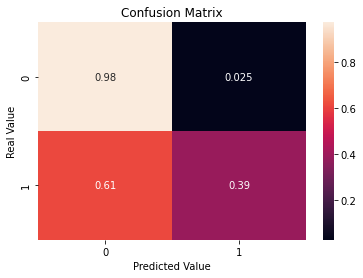

In [52]:
# Predictions
pred_lr = pipe_lr.predict(X_test)

# Classification report
print(classification_report(y_test, pred_lr))

# Confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred_lr, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

**Support Vector Machine**

In [53]:
pipe_svc = make_pipeline(StandardScaler(), SVC())
#pipe_svc = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe_svc.fit(X_train, y_train)
pipe_svc.score(X_test, y_test)

0.9058651976668827

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10931
           1       0.68      0.34      0.45      1413

    accuracy                           0.91     12344
   macro avg       0.80      0.66      0.70     12344
weighted avg       0.89      0.91      0.89     12344



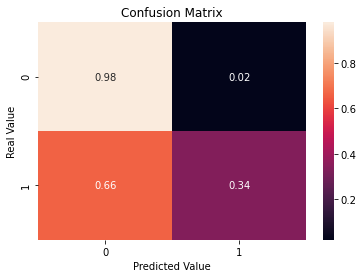

In [61]:
# Predictions
pred_svc = pipe_svc.predict(X_test)

# Classification report
print(classification_report(y_test, pred_svc))

# Confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred_svc, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

**XGBOOST**

In [64]:
pipe_xgb = make_pipeline(StandardScaler(), XGBClassifier(use_label_encoder =False, objective= 'binary:logistic', nthread=4, seed=42))
pipe_xgb.fit(X_train, y_train)
pipe_xgb.score(X_test, y_test)

[22:48:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9149384316267012

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10931
           1       0.66      0.54      0.59      1413

    accuracy                           0.91     12344
   macro avg       0.80      0.75      0.77     12344
weighted avg       0.91      0.91      0.91     12344



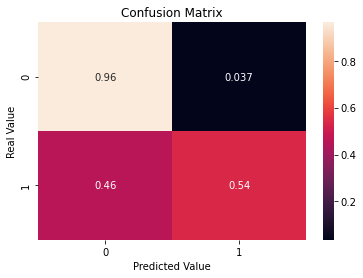

In [65]:
# Predictions
pred_xgb = pipe_xgb.predict(X_test)

# Classification report
print(classification_report(y_test, pred_xgb))

# Confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred_xgb, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

It seems that all models performed very well, specially with the majority class. All three of them have 0.95 as F-1 score, 
but XGBoost did greater in the minority class improving a lot from 0.45 as F-1 score in SVM, and 0.50 in Logistic Regression, 
going up to 0.59 in XGBoost. So in general, XGBoost performed better and we will choose it for our predictions.